# IDEA
### A single time user(Customer) will make the most use of the citibike within his timelimit than a subscriber

# Null Hypothesis ($H_0$)
### The mean trip duration of single time user (customer) is less than or equal to the mean trip duration of the subscribers.

### $H_0$ : T(customer) <= T(subscriber)

# Alternate Hypothesis ($H_a$)

### The mean trip duration of single time user (customer) is more than the mean trip duration of the subscribers.

### $H_a$: T(customer) > T(subscriber)

# Significance Threshold:
### α = 0.05

In [15]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import os

def getCitiBikeCSV(datestring):
    '''The function downloads a CSV file into the PUIDATA directory from the Citibike database for the given datestring
    Author: vys217 lifting code from 
    https://github.com/fedhere/PUI2016_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb
    '''
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            print("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201503'
getCitiBikeCSV(datestring)
getCitiBikeCSV(datestring)

file in place, you can continue
file in place, you can continue


In [3]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [4]:
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [5]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year','gender'], axis=1, inplace=True)

In [6]:
df.head()

,tripduration,usertype,date
0,669,Subscriber,2015-03-01 00:00:00
1,750,Subscriber,2015-03-01 00:01:00
2,663,Customer,2015-03-01 00:01:00
3,480,Subscriber,2015-03-01 00:02:00
4,1258,Subscriber,2015-03-01 00:02:00


In [7]:
fig=pl.figure(figsize(5,5))
users_mean = df.groupby(['usertype']).mean()

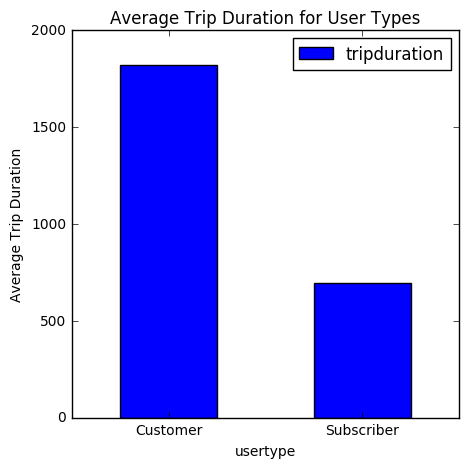

In [8]:
users_mean.plot(kind='bar',rot=360)
pl.ylabel('Average Trip Duration')
pl.title('Average Trip Duration for User Types')

## Figure 1: Average Trip Duration per User Type
### The average trip duration for the Customer is more than the Subscriber, i.e. the customer tries to maximize the use of citibikes. 

In [9]:
sub = df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday ]).mean()
cus = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()
sub = sub.to_frame()
cus = cus.to_frame()

(0, 4000)

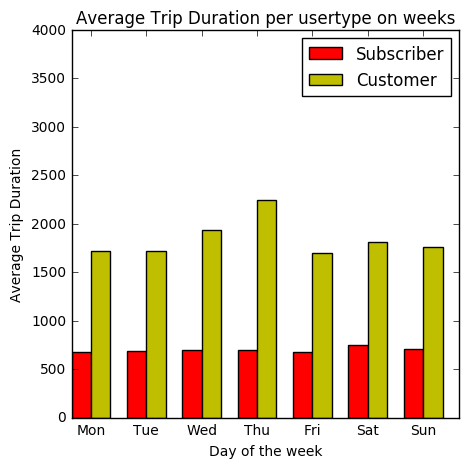

In [10]:
fig, ax = pl.subplots()

width = 0.35  
rects1 = ax.bar( sub.index.values , sub.tripduration, width, color='r')
rects2 = ax.bar(cus.index.values + width, cus.tripduration, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_xlabel('Day of the week')
ax.set_title('Average Trip Duration per usertype on weeks')
ax.set_xticks(cus.index.values + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))
pl.ylim(0,4000)

## Figure 2: The average trip Duration for the user types over a week 

In [11]:
# Checking for equal standard deviation
sub_std = df['tripduration'][df['usertype'] == 'Subscriber'].std()
cus_std = df['tripduration'][df['usertype'] == 'Customer'].std()
sub_std == cus_std

False

In [12]:
sub = df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday ]).mean()
cus = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()
total = df['tripduration'].groupby([df['date'].dt.weekday ]).mean()
sub = sub.to_frame()
cus = cus.to_frame()
total = total.to_frame()

In [16]:
stats.ttest_ind(sub, cus, equal_var= False)

Ttest_indResult(statistic=array([-15.40265241]), pvalue=array([  3.47154720e-06]))

Since p value is less than 5% we can reject the null hypothesis

In [17]:
# Refered https://github.com/AllenDowney/CompStats/blob/master/effect_size.ipynb 
# Concept reference: http://www.leeds.ac.uk/educol/documents/00002182.htm

def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

In [18]:
effect_size = CohenEffectSize(cus, sub)

In [19]:
effect_size[0]

8.2330640261319878

Since the value is greater than 0.5 we can say that the effect size is large